# ===============================================================================
* NOTEBOOK 2 : ANALYSE EXPLORATOIRE DES DONNÉES (EDA)
* Projet : Modèle de prévision de l'occupation des stades
# ===============================================================================

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr, chi2_contingency
import warnings
warnings.filterwarnings('ignore')
import os

# Configuration de l'affichage

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 10)

# 1. CHARGEMENT DES DONNÉES NETTOYÉES

In [3]:
print("\n[1] CHARGEMENT DES DONNÉES NETTOYÉES")
print("-"*80)

df = pd.read_csv('../data/processed/data_cleaned.csv')

print(f"✓ Données chargées avec succès")
print(f"  - Lignes : {df.shape[0]}")
print(f"  - Colonnes : {df.shape[1]}")

# Reconversion des dates si nécessaire
if 'date_Match' in df.columns:
    df['date_Match'] = pd.to_datetime(df['date_Match'])

print("\nPremières lignes :")
print(df.head())



[1] CHARGEMENT DES DONNÉES NETTOYÉES
--------------------------------------------------------------------------------
✓ Données chargées avec succès
  - Lignes : 363
  - Colonnes : 30

Premières lignes :
  Competition     saison                         Stade       Ville  Capacite                         Equipe_Home          Equipe_Away  Score  isDerby  PhaseImportance  is_important_match  is_top_team_home  affluence_moyenne date_Match heure_match  prix_billet_moyen  temperature  Recette_Moyenne                   source_file type_affluence  affluence_moyenne_originale  taux_occupation   annee  mois  jour_semaine  est_weekend categorie_stade  derby_top_team  is_outlier_affluence  is_outlier_taux
0  Botola Pro  2019/2020               Stade Mohamed V  Casablanca     67000  Club Athletic Youssoufia Berrechid      Difaâ El Jadida  01:00    False                1               False             False       20279.718043 2020-10-10       16:00                 60         20.3          1200000 

# 2. ANALYSE UNIVARIÉE - VARIABLE CIBLE

In [4]:
print("\n[2] ANALYSE UNIVARIÉE - VARIABLE CIBLE (AFFLUENCE)")
print("-"*80)

print("\n2.1 Statistiques descriptives de l'affluence :")
print(df['affluence_moyenne'].describe())

print("\n2.2 Mesures de forme :")
print(f"  - Skewness (asymétrie) : {df['affluence_moyenne'].skew():.3f}")
print(f"  - Kurtosis (aplatissement) : {df['affluence_moyenne'].kurtosis():.3f}")

# Test de normalité
stat_shapiro, p_shapiro = stats.shapiro(df['affluence_moyenne'].sample(min(5000, len(df))))
print(f"\n2.3 Test de normalité (Shapiro-Wilk) :")
print(f"  - Statistique : {stat_shapiro:.4f}")
print(f"  - p-value : {p_shapiro:.4f}")
print(f"  - Distribution {'normale' if p_shapiro > 0.05 else 'non-normale'} (α=0.05)")

print("\n2.4 Statistiques du taux d'occupation :")
print(df['taux_occupation'].describe())


[2] ANALYSE UNIVARIÉE - VARIABLE CIBLE (AFFLUENCE)
--------------------------------------------------------------------------------

2.1 Statistiques descriptives de l'affluence :
count      363.000000
mean     15025.278764
std      11973.905569
min          0.000000
25%       7000.726425
50%       9796.000000
75%      22008.978257
max      64178.000000
Name: affluence_moyenne, dtype: float64

2.2 Mesures de forme :
  - Skewness (asymétrie) : 1.569
  - Kurtosis (aplatissement) : 2.853

2.3 Test de normalité (Shapiro-Wilk) :
  - Statistique : 0.8385
  - p-value : 0.0000
  - Distribution non-normale (α=0.05)

2.4 Statistiques du taux d'occupation :
count    363.000000
mean      47.344456
std       23.893227
min        0.000000
25%       31.260316
50%       47.649470
75%       66.474755
max       99.740000
Name: taux_occupation, dtype: float64


# 3. VISUALISATIONS UNIVARIÉES



[3] VISUALISATIONS UNIVARIÉES
--------------------------------------------------------------------------------
✓ Visualisations sauvegardées : ../visualisation/eda/eda_univariate.png


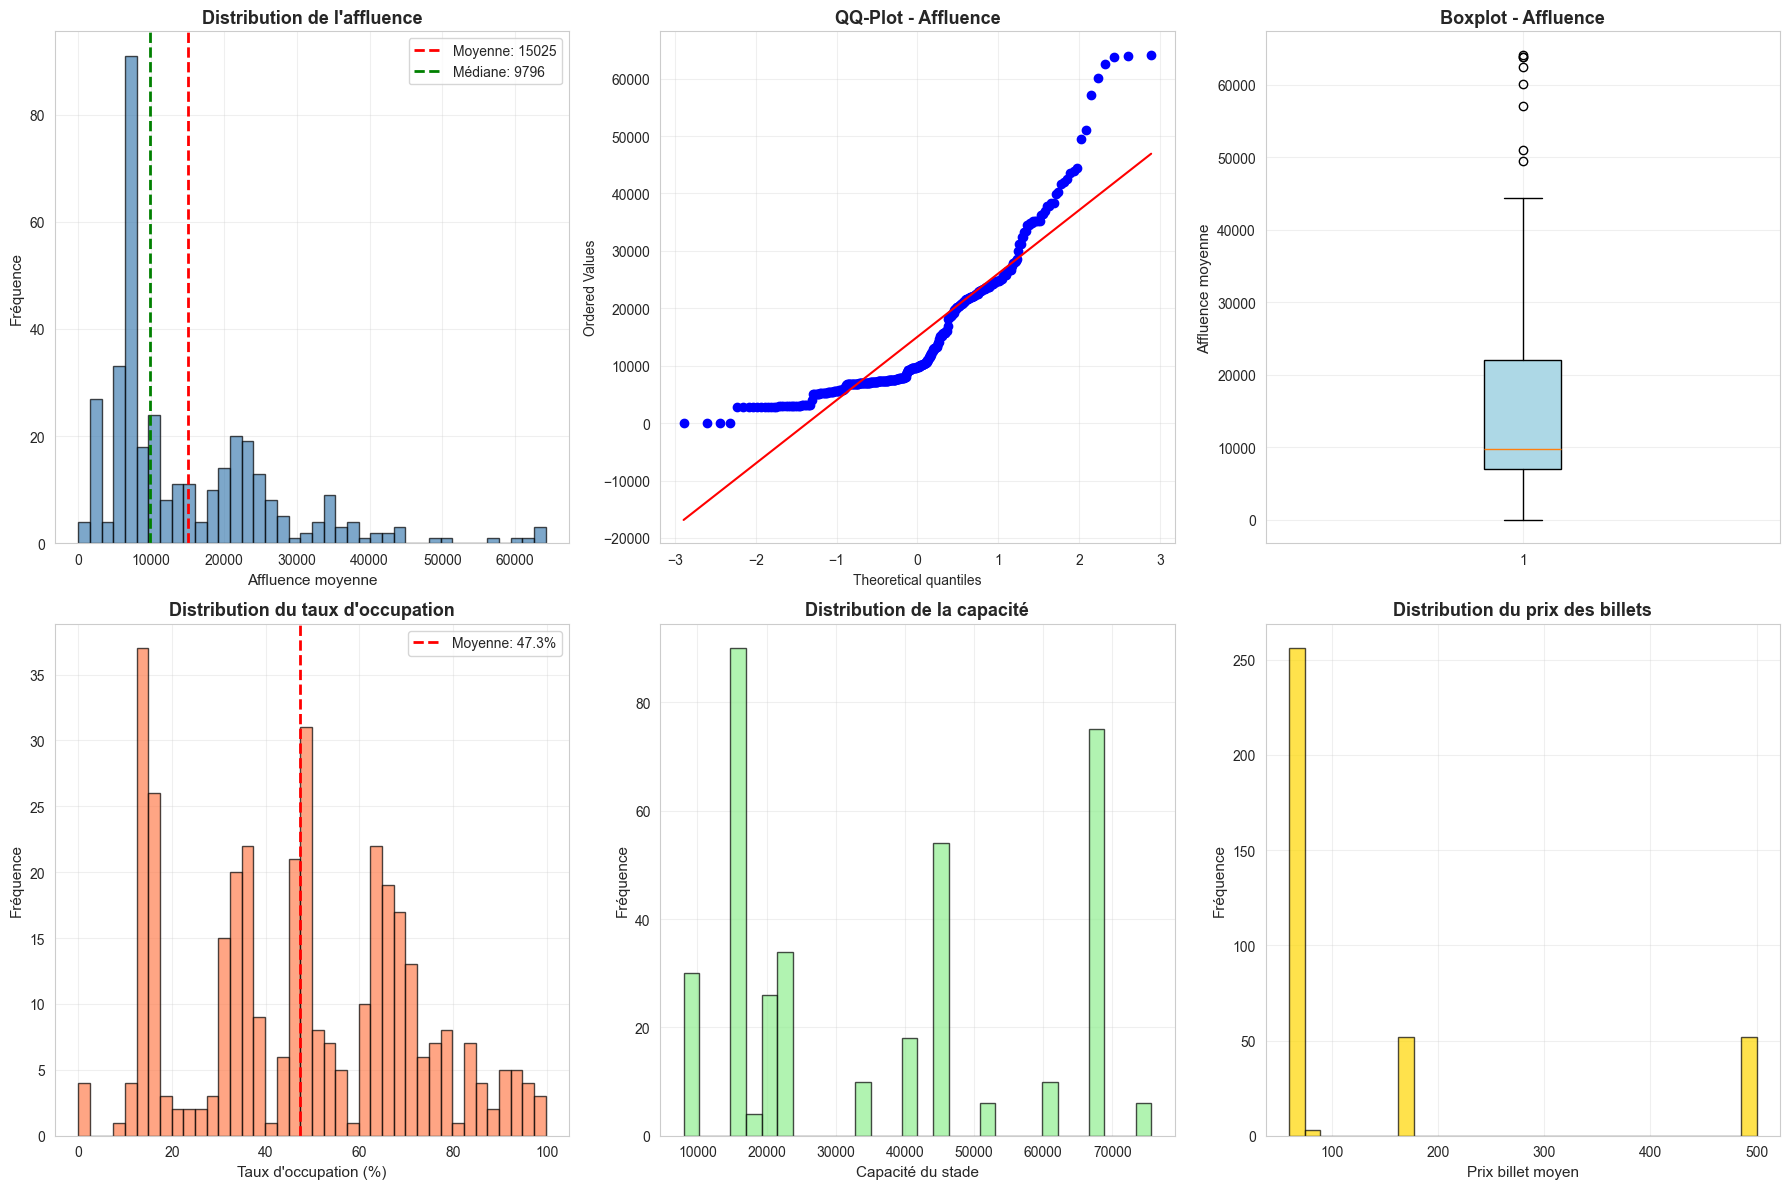

In [8]:
print("\n[3] VISUALISATIONS UNIVARIÉES")
print("-"*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Distribution de l'affluence
axes[0, 0].hist(df['affluence_moyenne'], bins=40, color='steelblue', 
                edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['affluence_moyenne'].mean(), color='red', 
                   linestyle='--', linewidth=2, label=f"Moyenne: {df['affluence_moyenne'].mean():.0f}")
axes[0, 0].axvline(df['affluence_moyenne'].median(), color='green', 
                   linestyle='--', linewidth=2, label=f"Médiane: {df['affluence_moyenne'].median():.0f}")
axes[0, 0].set_xlabel('Affluence moyenne', fontsize=11)
axes[0, 0].set_ylabel('Fréquence', fontsize=11)
axes[0, 0].set_title('Distribution de l\'affluence', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# QQ-plot pour normalité
stats.probplot(df['affluence_moyenne'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('QQ-Plot - Affluence', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Boxplot affluence
axes[0, 2].boxplot(df['affluence_moyenne'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue'))
axes[0, 2].set_ylabel('Affluence moyenne', fontsize=11)
axes[0, 2].set_title('Boxplot - Affluence', fontsize=13, fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# Distribution du taux d'occupation
axes[1, 0].hist(df['taux_occupation'], bins=40, color='coral', 
                edgecolor='black', alpha=0.7)
axes[1, 0].axvline(df['taux_occupation'].mean(), color='red', 
                   linestyle='--', linewidth=2, label=f"Moyenne: {df['taux_occupation'].mean():.1f}%")
axes[1, 0].set_xlabel('Taux d\'occupation (%)', fontsize=11)
axes[1, 0].set_ylabel('Fréquence', fontsize=11)
axes[1, 0].set_title('Distribution du taux d\'occupation', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Distribution de la capacité
axes[1, 1].hist(df['Capacite'], bins=30, color='lightgreen', 
                edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Capacité du stade', fontsize=11)
axes[1, 1].set_ylabel('Fréquence', fontsize=11)
axes[1, 1].set_title('Distribution de la capacité', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# Distribution du prix des billets
axes[1, 2].hist(df['prix_billet_moyen'].dropna(), bins=30, color='gold', 
                edgecolor='black', alpha=0.7)
axes[1, 2].set_xlabel('Prix billet moyen', fontsize=11)
axes[1, 2].set_ylabel('Fréquence', fontsize=11)
axes[1, 2].set_title('Distribution du prix des billets', fontsize=13, fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)




plt.tight_layout()
output_path = "../visualisation/eda"
os.makedirs(output_path, exist_ok=True)

plt.savefig(f"{output_path}/eda_univariate.png", dpi=300, bbox_inches='tight')
print(f"✓ Visualisations sauvegardées : {output_path}/eda_univariate.png")
plt.show()


# 4. ANALYSE PAR COMPÉTITION


[4] ANALYSE PAR COMPÉTITION
--------------------------------------------------------------------------------

4.1 Statistiques par compétition :
                    affluence_moyenne                                         taux_occupation  Capacite prix_billet_moyen
                                count      mean       std       min       max            mean      mean              mean
Competition                                                                                                              
Botola Pro                        240  10789.78   7415.85   2736.13  26734.87           41.22  31810.00             60.00
CAN                               104  21417.68  14785.68      0.00  64178.00           56.64  41819.81            332.00
FIFA Club World Cup                19  33536.26   8078.17  18458.00  44439.00           73.87  45714.16             63.16
✓ Analyses par compétition sauvegardées : ../visualisation/eda/eda_competition.png


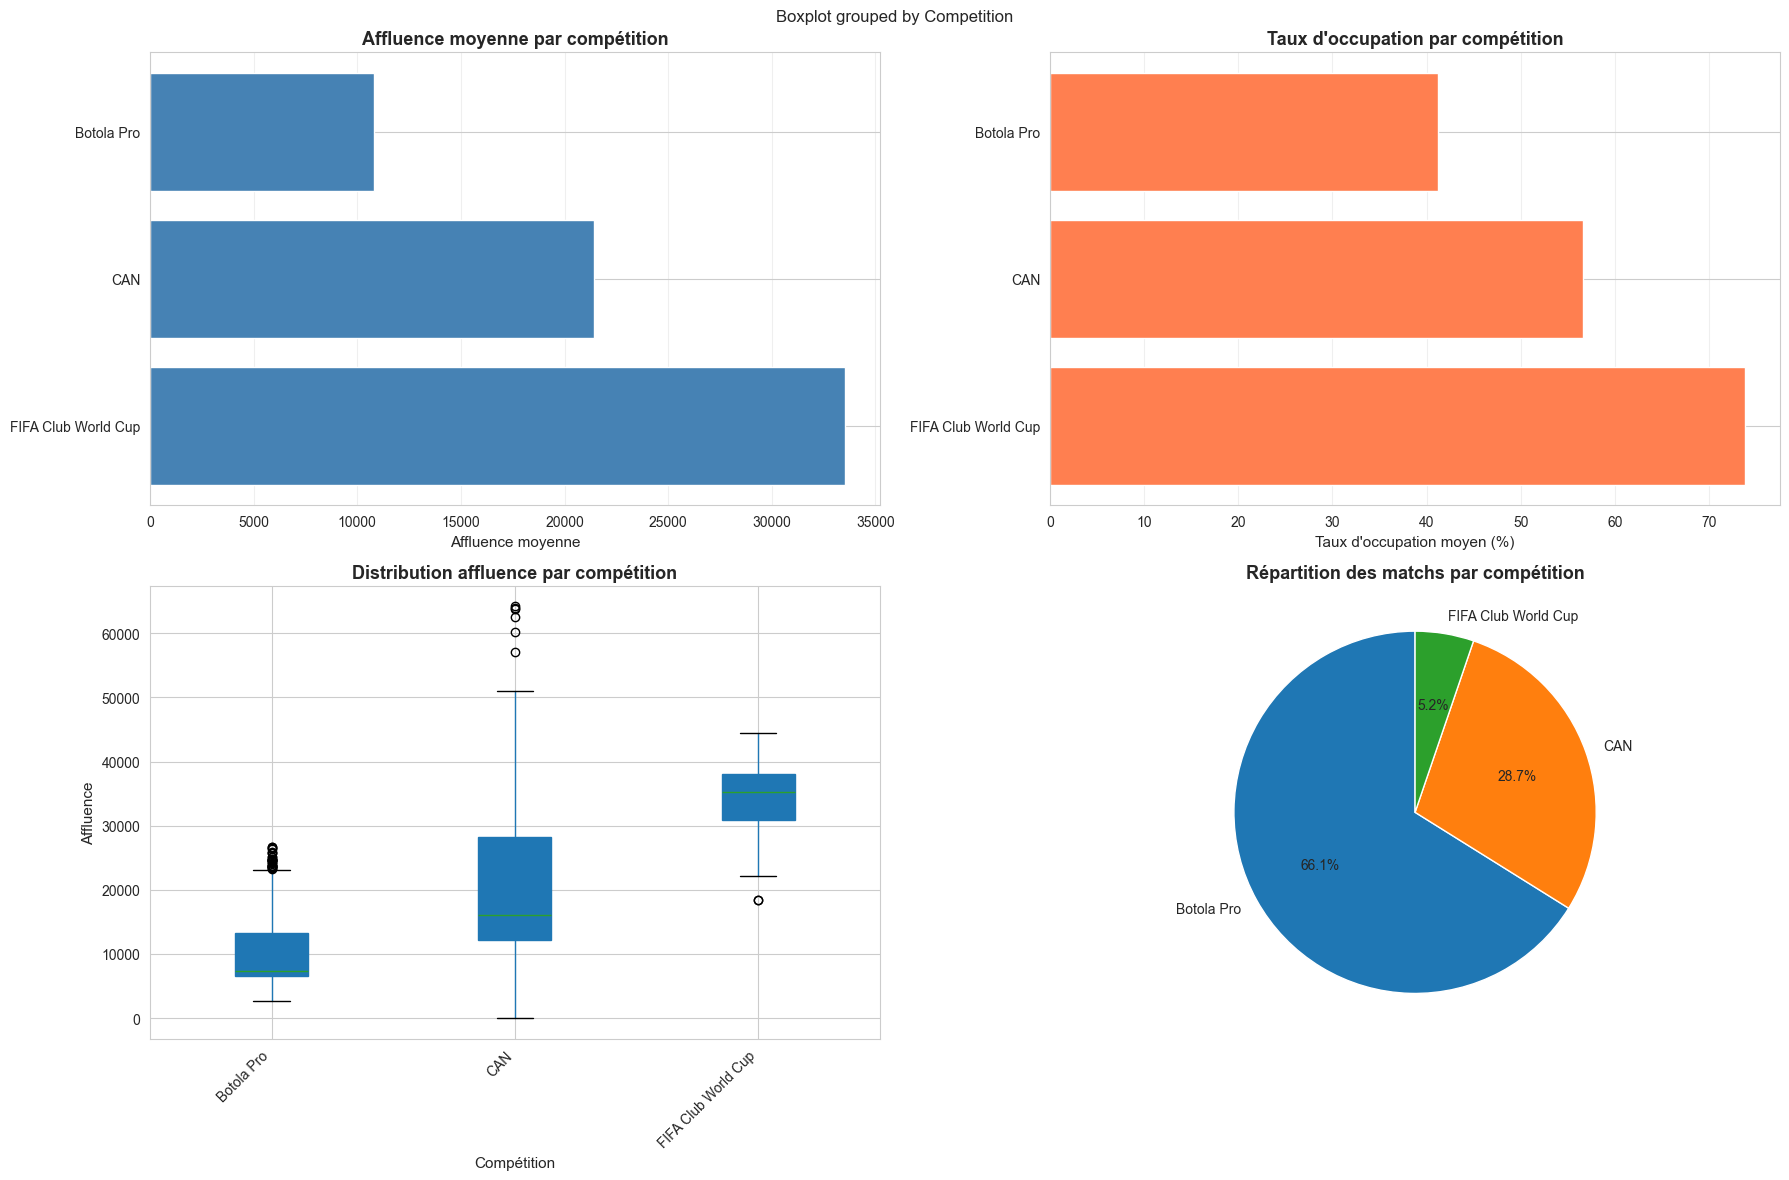

In [9]:
print("\n[4] ANALYSE PAR COMPÉTITION")
print("-"*80)

print("\n4.1 Statistiques par compétition :")
stats_competition = df.groupby('Competition').agg({
    'affluence_moyenne': ['count', 'mean', 'std', 'min', 'max'],
    'taux_occupation': 'mean',
    'Capacite': 'mean',
    'prix_billet_moyen': 'mean'
}).round(2)
print(stats_competition)

# Visualisation par compétition
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Affluence moyenne par compétition
comp_affluence = df.groupby('Competition')['affluence_moyenne'].mean().sort_values(ascending=False)
axes[0, 0].barh(comp_affluence.index, comp_affluence.values, color='steelblue')
axes[0, 0].set_xlabel('Affluence moyenne', fontsize=11)
axes[0, 0].set_title('Affluence moyenne par compétition', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Taux d'occupation par compétition
comp_taux = df.groupby('Competition')['taux_occupation'].mean().sort_values(ascending=False)
axes[0, 1].barh(comp_taux.index, comp_taux.values, color='coral')
axes[0, 1].set_xlabel('Taux d\'occupation moyen (%)', fontsize=11)
axes[0, 1].set_title('Taux d\'occupation par compétition', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Boxplot affluence par compétition
df.boxplot(column='affluence_moyenne', by='Competition', ax=axes[1, 0], patch_artist=True)
axes[1, 0].set_xlabel('Compétition', fontsize=11)
axes[1, 0].set_ylabel('Affluence', fontsize=11)
axes[1, 0].set_title('Distribution affluence par compétition', fontsize=13, fontweight='bold')
plt.sca(axes[1, 0])
plt.xticks(rotation=45, ha='right')

# Nombre de matchs par compétition
comp_count = df['Competition'].value_counts()
axes[1, 1].pie(comp_count.values, labels=comp_count.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Répartition des matchs par compétition', fontsize=13, fontweight='bold')


plt.tight_layout()
output_path = "../visualisation/eda"
os.makedirs(output_path, exist_ok=True)

plt.savefig(f"{output_path}/eda_competition.png", dpi=300, bbox_inches='tight')
print(f"✓ Analyses par compétition sauvegardées : {output_path}/eda_competition.png")
plt.show()


# 5. ANALYSE DES VARIABLES BOOLÉENNES


[5] ANALYSE DES VARIABLES BOOLÉENNES
--------------------------------------------------------------------------------

5.1 Impact de 'isDerby' sur l'affluence :
         count          mean           std
isDerby                                   
False      349  14318.298543  11179.255441
True        14  32649.285714  17291.750098
  Test t : t=5.870, p-value=0.0000
  Différence significative (α=0.05)

5.2 Impact de 'is_important_match' sur l'affluence :
                    count          mean           std
is_important_match                                   
False                 242  13108.998259   8970.360337
True                  121  18857.839774  15769.944021
  Test t : t=4.421, p-value=0.0000
  Différence significative (α=0.05)

5.3 Impact de 'is_top_team_home' sur l'affluence :
                  count          mean          std
is_top_team_home                                  
False               242  12538.265190   9144.68719
True                121  19999.305913  15071.3188

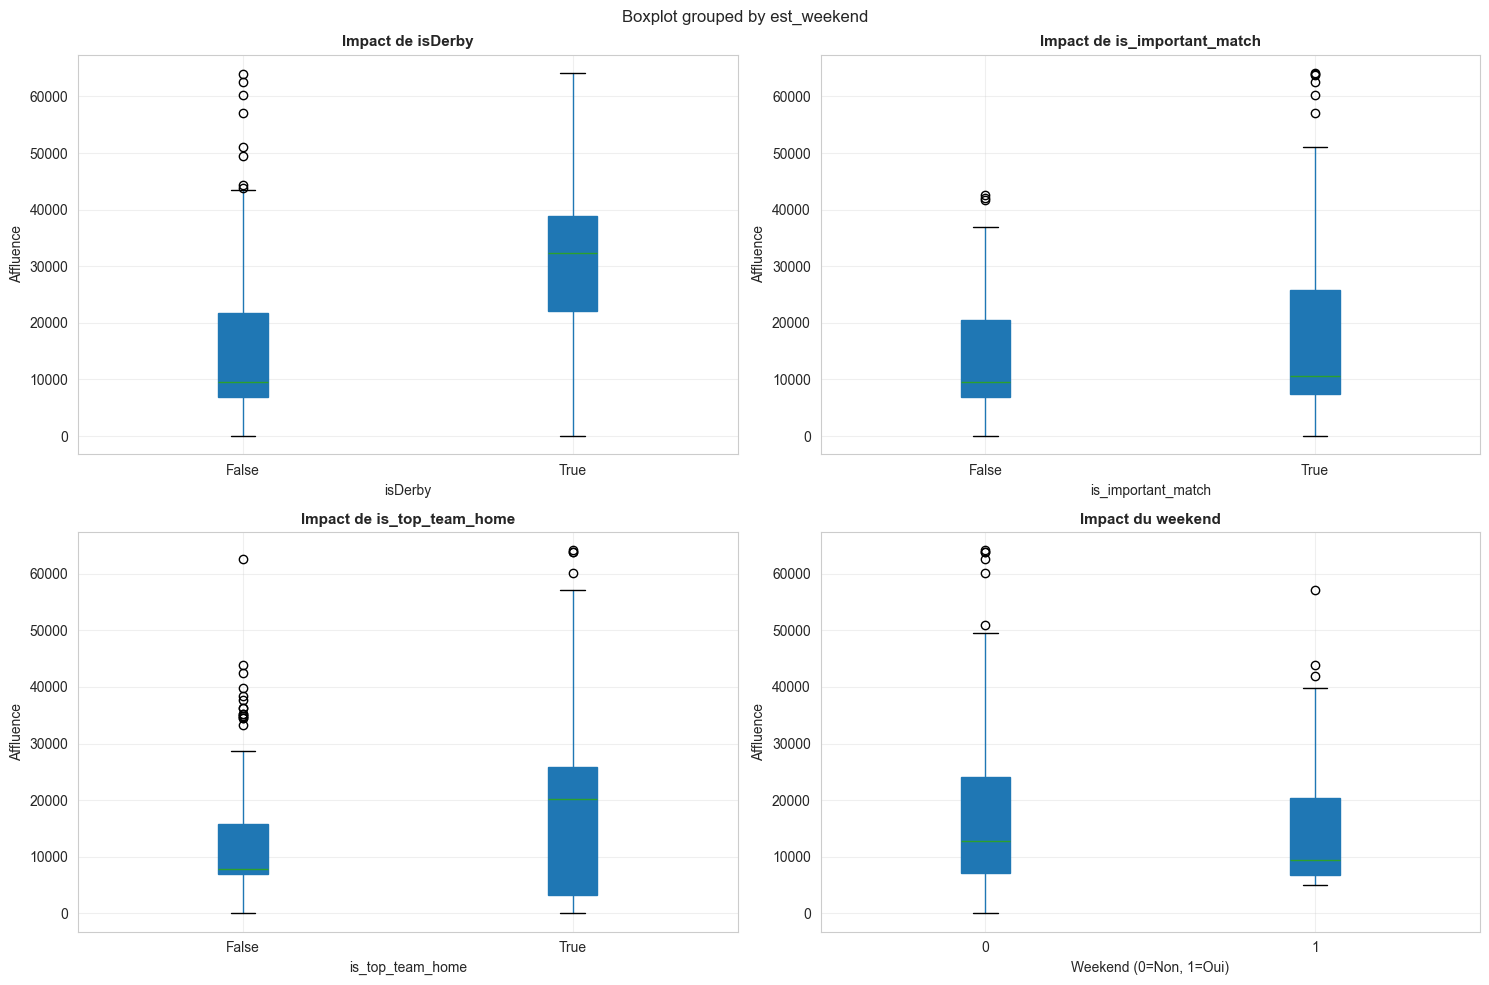

In [10]:
print("\n[5] ANALYSE DES VARIABLES BOOLÉENNES")
print("-"*80)

variables_bool = ['isDerby', 'is_important_match', 'is_top_team_home']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, var in enumerate(variables_bool):
    if var in df.columns:
        print(f"\n5.{idx+1} Impact de '{var}' sur l'affluence :")
        
        # Statistiques
        stats_bool = df.groupby(var)['affluence_moyenne'].agg(['count', 'mean', 'std'])
        print(stats_bool)
        
        # Test t de Student
        group_true = df[df[var] == True]['affluence_moyenne']
        group_false = df[df[var] == False]['affluence_moyenne']
        
        if len(group_true) > 0 and len(group_false) > 0:
            t_stat, p_value = stats.ttest_ind(group_true, group_false)
            print(f"  Test t : t={t_stat:.3f}, p-value={p_value:.4f}")
            print(f"  Différence {'significative' if p_value < 0.05 else 'non significative'} (α=0.05)")
        
        # Visualisation
        df.boxplot(column='affluence_moyenne', by=var, ax=axes[idx], patch_artist=True)
        axes[idx].set_xlabel(var, fontsize=10)
        axes[idx].set_ylabel('Affluence', fontsize=10)
        axes[idx].set_title(f'Impact de {var}', fontsize=11, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)

# Weekend vs Semaine
if 'est_weekend' in df.columns:
    print(f"\n5.4 Impact du weekend sur l'affluence :")
    stats_weekend = df.groupby('est_weekend')['affluence_moyenne'].agg(['count', 'mean', 'std'])
    print(stats_weekend)
    
    group_weekend = df[df['est_weekend'] == 1]['affluence_moyenne']
    group_semaine = df[df['est_weekend'] == 0]['affluence_moyenne']
    
    if len(group_weekend) > 0 and len(group_semaine) > 0:
        t_stat, p_value = stats.ttest_ind(group_weekend, group_semaine)
        print(f"  Test t : t={t_stat:.3f}, p-value={p_value:.4f}")
    
    df.boxplot(column='affluence_moyenne', by='est_weekend', ax=axes[3], patch_artist=True)
    axes[3].set_xlabel('Weekend (0=Non, 1=Oui)', fontsize=10)
    axes[3].set_ylabel('Affluence', fontsize=10)
    axes[3].set_title('Impact du weekend', fontsize=11, fontweight='bold')
    axes[3].grid(True, alpha=0.3)

plt.tight_layout()
output_path = "../visualisation/eda"
os.makedirs(output_path, exist_ok=True)

plt.savefig(f"{output_path}/eda_boolean_vars.png", dpi=300, bbox_inches='tight')
print(f"✓ Analyses des variables booléennes sauvegardées : {output_path}/eda_boolean_vars.png")
plt.show()

# 6. ANALYSE TEMPORELLE


[6] ANALYSE TEMPORELLE
--------------------------------------------------------------------------------
✓ Analyses temporelles sauvegardées : ../visualisation/eda/eda_temporal.png


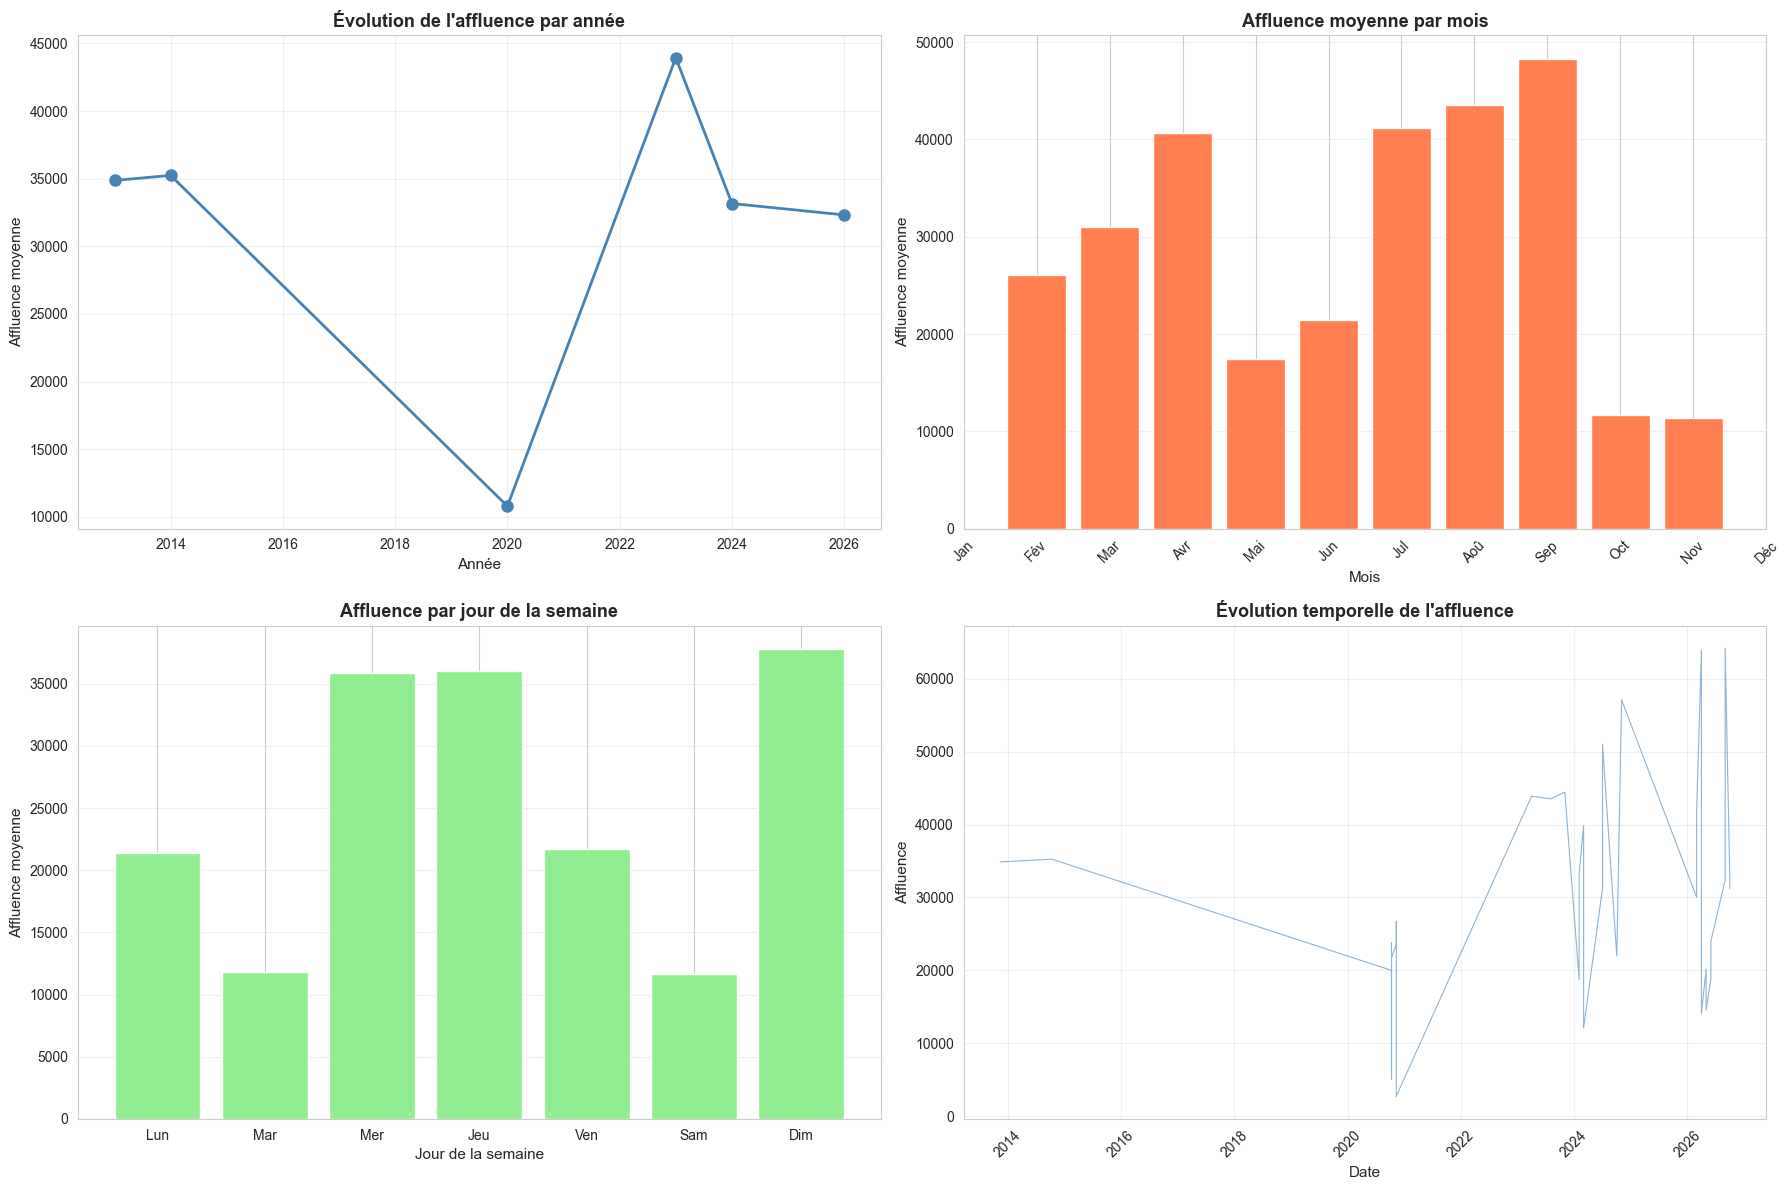

In [11]:
print("\n[6] ANALYSE TEMPORELLE")
print("-"*80)

if 'date_Match' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # Affluence par année
    if 'annee' in df.columns:
        affluence_annee = df.groupby('annee')['affluence_moyenne'].mean()
        axes[0, 0].plot(affluence_annee.index, affluence_annee.values, marker='o', 
                        linewidth=2, markersize=8, color='steelblue')
        axes[0, 0].set_xlabel('Année', fontsize=11)
        axes[0, 0].set_ylabel('Affluence moyenne', fontsize=11)
        axes[0, 0].set_title('Évolution de l\'affluence par année', fontsize=13, fontweight='bold')
        axes[0, 0].grid(True, alpha=0.3)
    
    # Affluence par mois
    if 'mois' in df.columns:
        affluence_mois = df.groupby('mois')['affluence_moyenne'].mean()
        mois_labels = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 
                       'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']
        axes[0, 1].bar(affluence_mois.index, affluence_mois.values, color='coral')
        axes[0, 1].set_xlabel('Mois', fontsize=11)
        axes[0, 1].set_ylabel('Affluence moyenne', fontsize=11)
        axes[0, 1].set_title('Affluence moyenne par mois', fontsize=13, fontweight='bold')
        axes[0, 1].set_xticks(range(1, 13))
        axes[0, 1].set_xticklabels(mois_labels, rotation=45)
        axes[0, 1].grid(True, alpha=0.3, axis='y')
    
    # Affluence par jour de la semaine
    if 'jour_semaine' in df.columns:
        affluence_jour = df.groupby('jour_semaine')['affluence_moyenne'].mean()
        jour_labels = ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
        axes[1, 0].bar(affluence_jour.index, affluence_jour.values, color='lightgreen')
        axes[1, 0].set_xlabel('Jour de la semaine', fontsize=11)
        axes[1, 0].set_ylabel('Affluence moyenne', fontsize=11)
        axes[1, 0].set_title('Affluence par jour de la semaine', fontsize=13, fontweight='bold')
        axes[1, 0].set_xticks(range(7))
        axes[1, 0].set_xticklabels(jour_labels)
        axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # Évolution temporelle globale
    df_sorted = df.sort_values('date_Match')
    axes[1, 1].plot(df_sorted['date_Match'], df_sorted['affluence_moyenne'], 
                    alpha=0.6, linewidth=0.8, color='steelblue')
    axes[1, 1].set_xlabel('Date', fontsize=11)
    axes[1, 1].set_ylabel('Affluence', fontsize=11)
    axes[1, 1].set_title('Évolution temporelle de l\'affluence', fontsize=13, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45)
    
    plt.tight_layout()
    output_path = "../visualisation/eda"
    os.makedirs(output_path, exist_ok=True)

    plt.savefig(f"{output_path}/eda_temporal.png", dpi=300, bbox_inches='tight')
    print(f"✓ Analyses temporelles sauvegardées : {output_path}/eda_temporal.png")
    plt.show()


# 7. MATRICE DE CORRÉLATION


[7] MATRICE DE CORRÉLATION
--------------------------------------------------------------------------------

7.1 Corrélations avec l'affluence (top 10) :
affluence_moyenne    1.000000
Recette_Moyenne      0.690964
Capacite             0.602580
taux_occupation      0.469436
derby_top_team       0.295202
prix_billet_moyen    0.278311
PhaseImportance      0.085047
est_weekend         -0.153973
temperature         -0.299634
Name: affluence_moyenne, dtype: float64

7.2 Corrélations avec le taux d'occupation (top 10) :
taux_occupation      1.000000
affluence_moyenne    0.469436
Recette_Moyenne      0.346229
est_weekend          0.229395
derby_top_team       0.176267
prix_billet_moyen    0.074765
PhaseImportance      0.039946
temperature         -0.057886
Capacite            -0.334000
Name: taux_occupation, dtype: float64
✓ Matrices de corrélation sauvegardées : ../visualisation/eda/eda_correlation.png


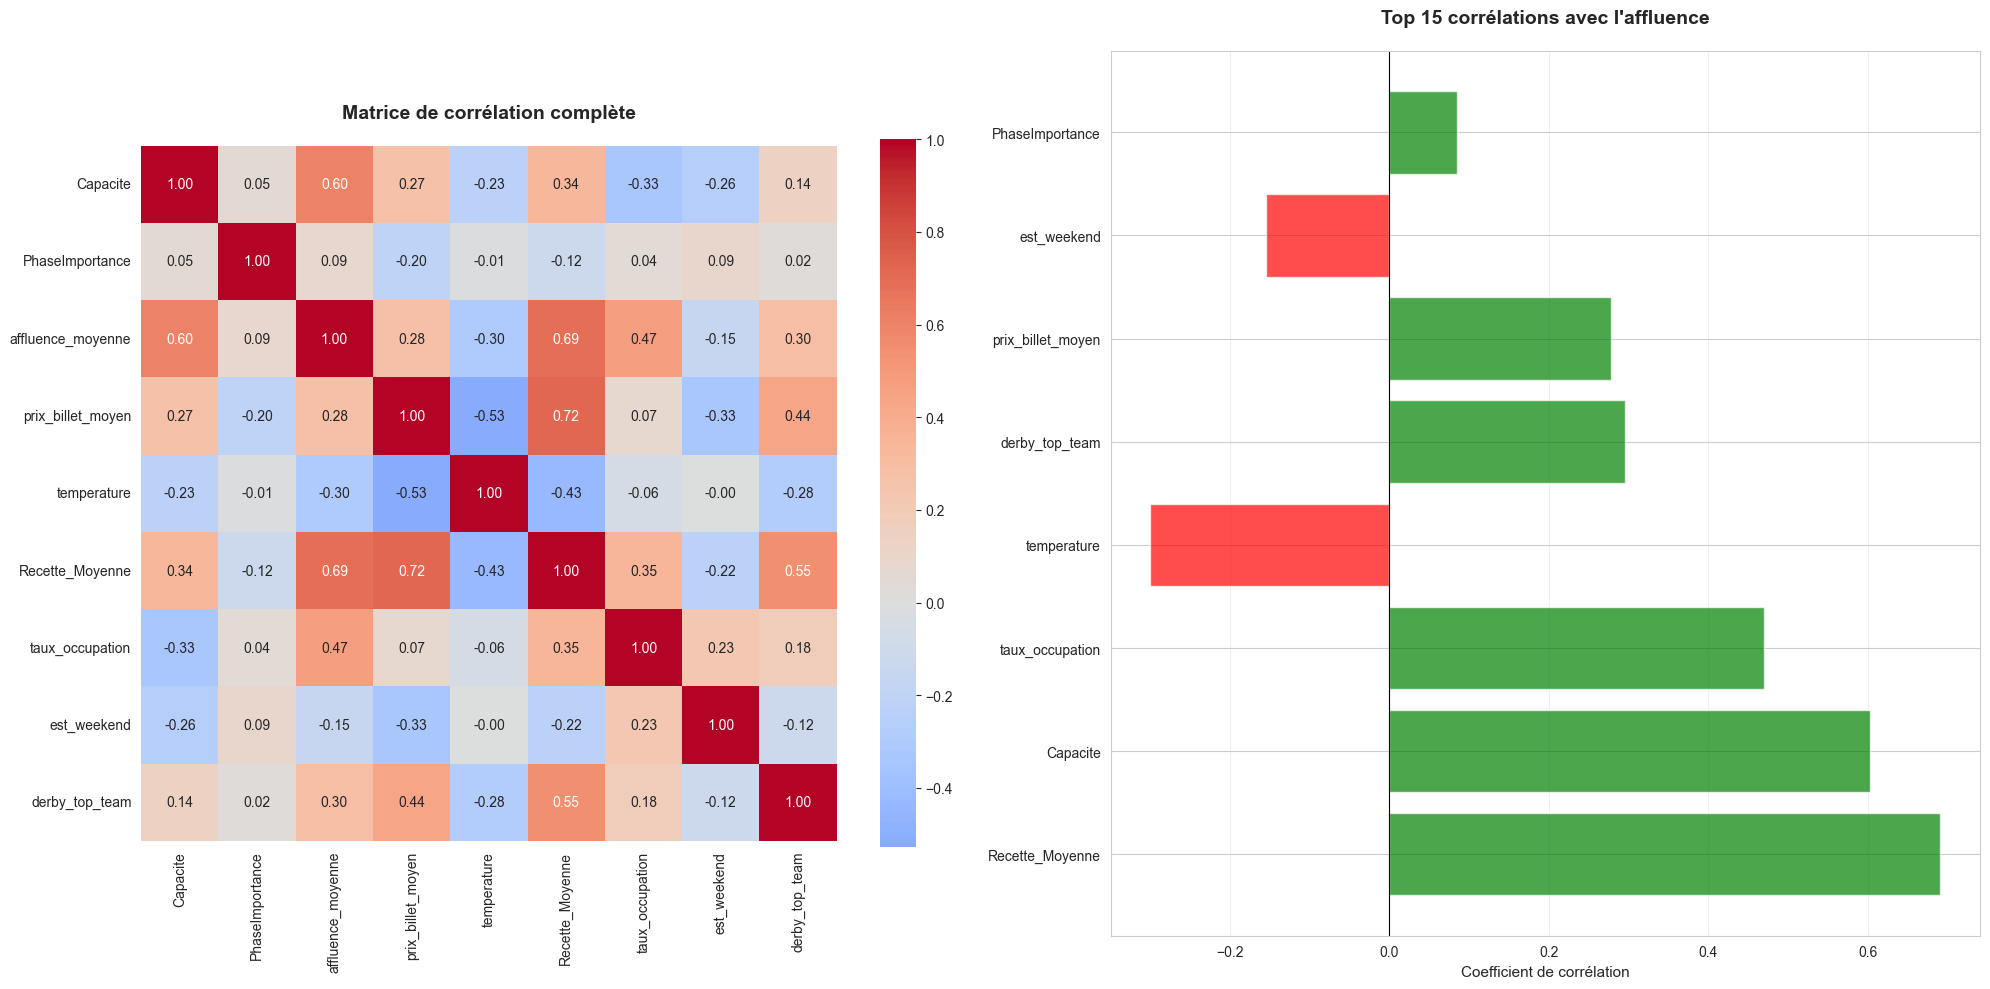

In [12]:
print("\n[7] MATRICE DE CORRÉLATION")
print("-"*80)

# Sélection des variables numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Retirer certaines colonnes non pertinentes
cols_to_remove = ['affluence_moyenne_originale', 'is_outlier_affluence', 
                  'is_outlier_taux', 'annee', 'mois', 'jour_semaine']
numeric_cols = [col for col in numeric_cols if col not in cols_to_remove]

# Calcul de la matrice de corrélation
corr_matrix = df[numeric_cols].corr()

print("\n7.1 Corrélations avec l'affluence (top 10) :")
corr_affluence = corr_matrix['affluence_moyenne'].sort_values(ascending=False)
print(corr_affluence.head(10))

print("\n7.2 Corrélations avec le taux d'occupation (top 10) :")
corr_taux = corr_matrix['taux_occupation'].sort_values(ascending=False)
print(corr_taux.head(10))

# Visualisation de la matrice de corrélation
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Matrice complète
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, ax=axes[0], cbar_kws={'shrink': 0.8})
axes[0].set_title('Matrice de corrélation complète', fontsize=14, fontweight='bold', pad=20)

# Corrélations avec affluence
corr_affluence_df = pd.DataFrame({
    'Variable': corr_affluence.index,
    'Corrélation': corr_affluence.values
})
corr_affluence_df = corr_affluence_df[corr_affluence_df['Variable'] != 'affluence_moyenne']
corr_affluence_df = corr_affluence_df.sort_values('Corrélation', key=abs, ascending=False).head(15)

colors = ['green' if x > 0 else 'red' for x in corr_affluence_df['Corrélation']]
axes[1].barh(corr_affluence_df['Variable'], corr_affluence_df['Corrélation'], color=colors, alpha=0.7)
axes[1].axvline(x=0, color='black', linewidth=0.8)
axes[1].set_xlabel('Coefficient de corrélation', fontsize=11)
axes[1].set_title('Top 15 corrélations avec l\'affluence', fontsize=14, fontweight='bold', pad=20)
axes[1].grid(True, alpha=0.3, axis='x')


plt.tight_layout()
output_path = "../visualisation/eda"
os.makedirs(output_path, exist_ok=True)

plt.savefig(f"{output_path}/eda_correlation.png", dpi=300, bbox_inches='tight')
print(f"✓ Matrices de corrélation sauvegardées : {output_path}/eda_correlation.png")
plt.show()

# 8. ANALYSES BIVARIÉES - VARIABLES CONTINUES


[8] ANALYSES BIVARIÉES - VARIABLES CONTINUES
--------------------------------------------------------------------------------

8.1 Corrélation affluence vs Capacite :
  - Pearson r = 0.603, p-value = 0.0000

8.2 Corrélation affluence vs prix_billet_moyen :
  - Pearson r = 0.278, p-value = 0.0000

8.3 Corrélation affluence vs temperature :
  - Pearson r = -0.300, p-value = 0.0000

8.4 Corrélation affluence vs Recette_Moyenne :
  - Pearson r = 0.691, p-value = 0.0000
✓ Analyses bivariées sauvegardées : ../visualisation/eda/eda_bivariate.png


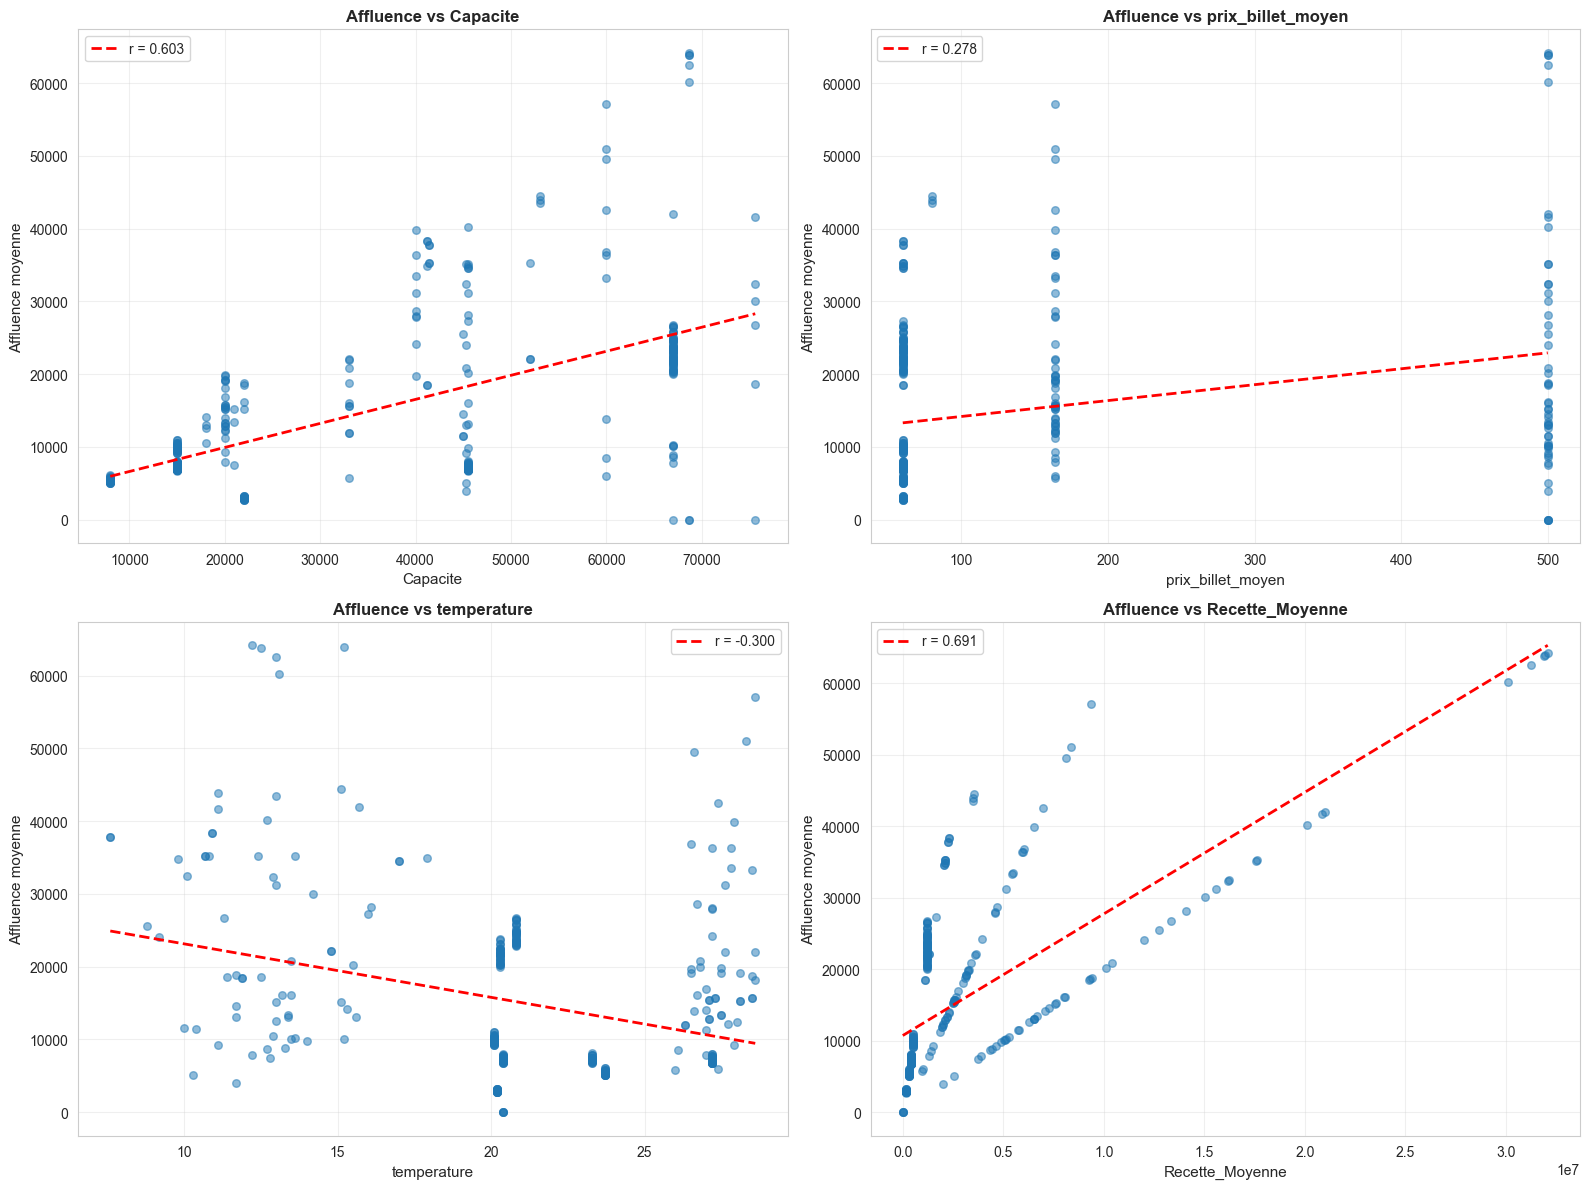

In [13]:
print("\n[8] ANALYSES BIVARIÉES - VARIABLES CONTINUES")
print("-"*80)

# Variables d'intérêt
var_continues = ['Capacite', 'prix_billet_moyen', 'temperature', 'Recette_Moyenne']
var_continues = [v for v in var_continues if v in df.columns]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, var in enumerate(var_continues[:4]):
    # Calcul de la corrélation
    corr, p_value = pearsonr(df[var].dropna(), 
                              df.loc[df[var].notna(), 'affluence_moyenne'])
    
    print(f"\n8.{idx+1} Corrélation affluence vs {var} :")
    print(f"  - Pearson r = {corr:.3f}, p-value = {p_value:.4f}")
    
    # Scatter plot
    axes[idx].scatter(df[var], df['affluence_moyenne'], alpha=0.5, s=30)
    
    # Ligne de régression
    z = np.polyfit(df[var].dropna(), df.loc[df[var].notna(), 'affluence_moyenne'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[var].min(), df[var].max(), 100)
    axes[idx].plot(x_line, p(x_line), "r--", linewidth=2, 
                   label=f'r = {corr:.3f}')
    
    axes[idx].set_xlabel(var, fontsize=11)
    axes[idx].set_ylabel('Affluence moyenne', fontsize=11)
    axes[idx].set_title(f'Affluence vs {var}', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)


    plt.tight_layout()
    output_path = "../visualisation/eda"
    os.makedirs(output_path, exist_ok=True)

    plt.savefig(f"{output_path}/eda_bivariate.png", dpi=300, bbox_inches='tight')
    print(f"✓ Analyses bivariées sauvegardées : {output_path}/eda_bivariate.png")
    plt.show()


# 9. ANALYSE PAR CATÉGORIE DE STADE


[9] ANALYSE PAR CATÉGORIE DE STADE
--------------------------------------------------------------------------------

9.1 Statistiques par catégorie de stade :
                affluence_moyenne                     taux_occupation  Capacite
                            count      mean       std            mean      mean
categorie_stade                                                                
Grand                          98  20607.35  13688.35           45.74  45191.11
Moyen                         184   8079.79   4042.18           53.44  15940.22

9.2 Test ANOVA :
  - F-statistique : nan
  - p-value : nan
  - Différence non significative entre catégories (α=0.05)
✓ Analyses par catégorie sauvegardées : ../visualisation/eda/eda_category.png


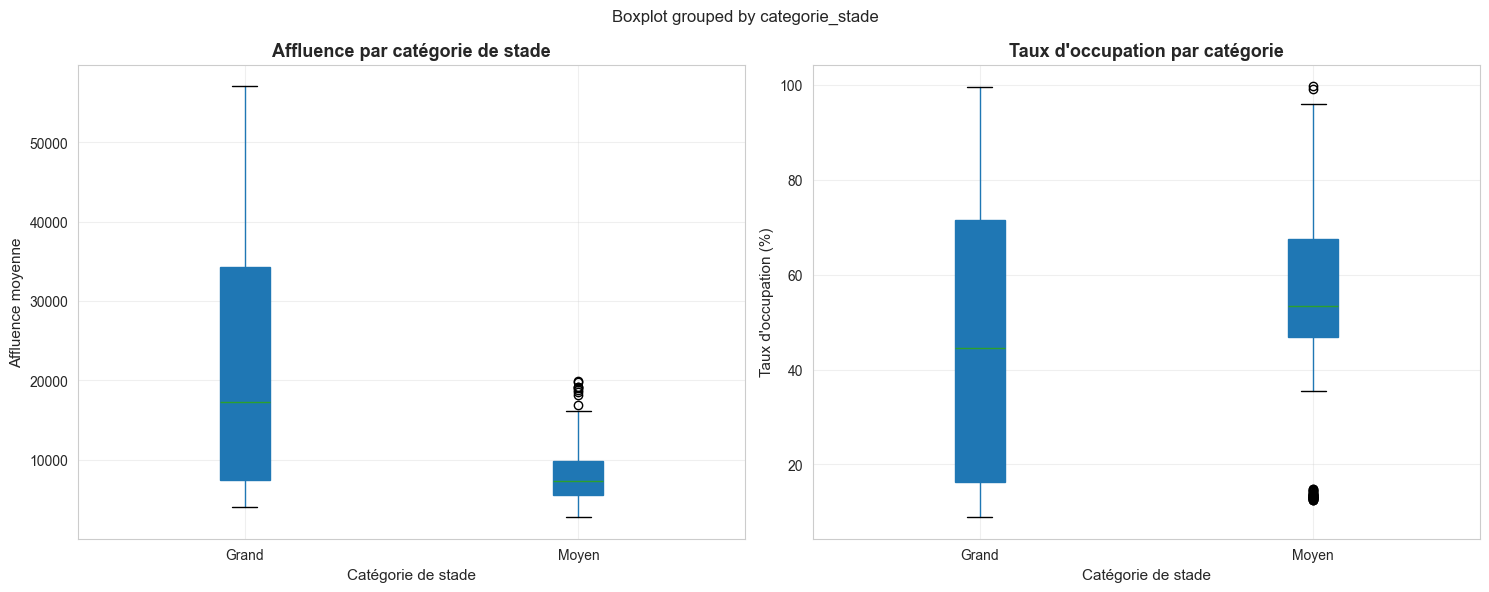

In [14]:
print("\n[9] ANALYSE PAR CATÉGORIE DE STADE")
print("-"*80)

if 'categorie_stade' in df.columns:
    print("\n9.1 Statistiques par catégorie de stade :")
    stats_categorie = df.groupby('categorie_stade').agg({
        'affluence_moyenne': ['count', 'mean', 'std'],
        'taux_occupation': 'mean',
        'Capacite': 'mean'
    }).round(2)
    print(stats_categorie)
    
    # Test ANOVA
    categories = df['categorie_stade'].unique()
    groups = [df[df['categorie_stade'] == cat]['affluence_moyenne'].values for cat in categories]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"\n9.2 Test ANOVA :")
    print(f"  - F-statistique : {f_stat:.3f}")
    print(f"  - p-value : {p_value:.4f}")
    print(f"  - Différence {'significative' if p_value < 0.05 else 'non significative'} entre catégories (α=0.05)")
    
    # Visualisation
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    df.boxplot(column='affluence_moyenne', by='categorie_stade', ax=axes[0], patch_artist=True)
    axes[0].set_xlabel('Catégorie de stade', fontsize=11)
    axes[0].set_ylabel('Affluence moyenne', fontsize=11)
    axes[0].set_title('Affluence par catégorie de stade', fontsize=13, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    
    df.boxplot(column='taux_occupation', by='categorie_stade', ax=axes[1], patch_artist=True)
    axes[1].set_xlabel('Catégorie de stade', fontsize=11)
    axes[1].set_ylabel('Taux d\'occupation (%)', fontsize=11)
    axes[1].set_title('Taux d\'occupation par catégorie', fontsize=13, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    
    plt.tight_layout()
    output_path = "../visualisation/eda"
    os.makedirs(output_path, exist_ok=True)

    plt.savefig(f"{output_path}/eda_category.png", dpi=300, bbox_inches='tight')
    print(f"✓ Analyses par catégorie sauvegardées : {output_path}/eda_category.png")
    plt.show()


# 10. SYNTHÈSE ET INSIGHTS CLÉS

In [ ]:
print("\n[10] SYNTHÈSE ET INSIGHTS CLÉS")
print("="*80)

insights = f"""
INSIGHTS CLÉS DE L'ANALYSE EXPLORATOIRE
========================================

1. VARIABLE CIBLE (Affluence)
   - Moyenne : {df['affluence_moyenne'].mean():.0f}
   - Médiane : {df['affluence_moyenne'].median():.0f}
   - Écart-type : {df['affluence_moyenne'].std():.0f}
   - Distribution : {'normale' if p_shapiro > 0.05 else 'non-normale'}

2. TAUX D'OCCUPATION
   - Moyenne : {df['taux_occupation'].mean():.1f}%
   - Min : {df['taux_occupation'].min():.1f}%
   - Max : {df['taux_occupation'].max():.1f}%

3. FACTEURS INFLUENTS
   - Capacité du stade : corrélation = {corr_matrix.loc['Capacite', 'affluence_moyenne']:.3f}
   - Prix du billet : corrélation = {corr_matrix.loc['prix_billet_moyen', 'affluence_moyenne']:.3f}
   - Top 3 variables corrélées : 
     {corr_affluence.iloc[1:4].to_string()}

4. COMPÉTITIONS
   - Plus forte affluence : {df.groupby('Competition')['affluence_moyenne'].mean().idxmax()}
   - Plus faible affluence : {df.groupby('Competition')['affluence_moyenne'].mean().idxmin()}

5. EFFETS BOOLÉENS
   - Derby : impact {'positif' if df[df['isDerby']==True]['affluence_moyenne'].mean() > df[df['isDerby']==False]['affluence_moyenne'].mean() else 'négatif'}
   - Match important : impact {'positif' if df[df['is_important_match']==True]['affluence_moyenne'].mean() > df[df['is_important_match']==False]['affluence_moyenne'].mean() else 'négatif'}
   - Top team : impact {'positif' if df[df['is_top_team_home']==True]['affluence_moyenne'].mean() > df[df['is_top_team_home']==False]['affluence_moyenne'].mean() else 'négatif'}

6. RECOMMANDATIONS POUR LA MODÉLISATION
   - Variables à inclure prioritairement : Capacite, isDerby, is_top_team_home
   - Variables temporelles pertinentes : mois, jour_semaine
   - Interactions potentielles : derby_top_team
   - Transformation possible : log(affluence) si distribution non-normale
"""

print(insights)

# Sauvegarde du rapport
with open('../rapport/rapport_eda.txt', 'w', encoding='utf-8') as f:
    f.write(insights)

print("\n✓ Rapport EDA sauvegardé : ../rapport/rapport_eda.txt")

print("\n" + "="*80)
print("ANALYSE EXPLORATOIRE TERMINÉE AVEC SUCCÈS !")
print("="*80)
print(f"\nFichiers générés :")
print(f"  1. data/processed/eda_univariate.png")
print(f"  2. data/processed/eda_competition.png")
print(f"  3. data/processed/eda_boolean_vars.png")
print(f"  4. data/processed/eda_temporal.png")
print(f"  5. data/processed/eda_correlation.png")
print(f"  6. data/processed/eda_bivariate.png")
print(f"  7. data/processed/eda_category.png")
print(f"  8. data/processed/rapport_eda.txt")
print("\nProchaine étape : Notebook 3 - ACP (Analyse en Composantes Principales)")


[10] SYNTHÈSE ET INSIGHTS CLÉS

INSIGHTS CLÉS DE L'ANALYSE EXPLORATOIRE

1. VARIABLE CIBLE (Affluence)
   - Moyenne : 15025
   - Médiane : 9796
   - Écart-type : 11974
   - Distribution : non-normale

2. TAUX D'OCCUPATION
   - Moyenne : 47.3%
   - Min : 0.0%
   - Max : 99.7%

3. FACTEURS INFLUENTS
   - Capacité du stade : corrélation = 0.603
   - Prix du billet : corrélation = 0.278
   - Top 3 variables corrélées : 
     Recette_Moyenne    0.690964
Capacite           0.602580
taux_occupation    0.469436

4. COMPÉTITIONS
   - Plus forte affluence : FIFA Club World Cup
   - Plus faible affluence : Botola Pro

5. EFFETS BOOLÉENS
   - Derby : impact positif
   - Match important : impact positif
   - Top team : impact positif

6. RECOMMANDATIONS POUR LA MODÉLISATION
   - Variables à inclure prioritairement : Capacite, isDerby, is_top_team_home
   - Variables temporelles pertinentes : mois, jour_semaine
   - Interactions potentielles : derby_top_team
   - Transformation possible : log(afflu